In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('streaming_platform.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Unnamed: 11
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV",NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers",NaN
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,1-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",NaN
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",NaN
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies",NaN


# Dataset Structure Analysis and Treatment

In [3]:
df.shape

(8807, 12)

Shape of data set: 8807 rows and 12 columns

Unknown and empty column is detected. Need to drop/delete it

In [4]:
df.drop(columns='Unnamed: 11', inplace=True)

In [5]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [6]:
#Method to check count of clustered cell
df[df.director.apply(lambda x: ',' in str(x))].director.count()

614

In [7]:
df[df.cast.apply(lambda x: ',' in str(x))].cast.count()

7101

In [8]:
df[df.country.apply(lambda x: ',' in str(x))].country.count()

1320

In [9]:
df[df.rating.apply(lambda x: ',' in str(x))].rating.count()

0

In [10]:
df[df.listed_in.apply(lambda x: ',' in str(x))].listed_in.count()

6787

In [11]:
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


- Most of the columns are strings except release_year
- title, director, cast, country, date_added, rating, duration column has null values. We can treat them by following below steps.
    - title: Unknown_Title
    - director: Unknown_Director
    - cast: Unknown_Cast
    - country: Unknown_Country
    - date_added: 0
    - rating: Unknown_Genre
    - Duration: 0
- It looks like some of the columns has mutiple names/values clustered and separator is ','. We need to disperse it for better analysis, those are: director, cast, country, listed_in. (some offical titles comes with ',' as a part of it so ignoring this column)
- As there are only 2 types, Movie and TV Shows and it is noticed that all the duration of movies are in minutes and for TV Shows are in seasons, we need to make it in integer
- date_added column needs to be in date format
- Changing the column name of listed_in to genre

In [13]:
df.title.fillna('Unknown_Title', inplace=True)
df.director.fillna('Unknown_Director', inplace=True)
df.cast.fillna('Unknown_Cast', inplace=True)
df.country.fillna('Unknown_Country', inplace=True)
df.date_added.fillna(0, inplace=True)
df.rating.fillna('Unknown_Genre', inplace=True)
df.duration.fillna(0, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


In [15]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_Cast,United States,25-Sep-21,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,Unknown_Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown_Country,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Unknown_Director,Unknown_Cast,Unknown_Country,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,Unknown_Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,Unknown_Director,Unknown_Cast,Unknown_Country,1-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies"


In [16]:
#checking a process
x='Ama Qamata, Khosi Ngema, Gail Mabalane'
x.split(', ')

['Ama Qamata', 'Khosi Ngema', 'Gail Mabalane']

In [17]:
def cluster(x):
    return x.split(', ')

In [18]:
df.director=df.director.apply(cluster)
df.cast=df.cast.apply(cluster)
df.country=df.country.apply(cluster)
df.listed_in=df.listed_in.apply(cluster)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown_Cast],[United States],25-Sep-21,2020,PG-13,90 min,[Documentaries]
1,s2,TV Show,Blood & Water,[Unknown_Director],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],24-Sep-21,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[Unknown_Country],24-Sep-21,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,[Unknown_Director],[Unknown_Cast],[Unknown_Country],24-Sep-21,2021,TV-MA,1 Season,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,[Unknown_Director],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],24-Sep-21,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV..."
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,[David Fincher],"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",[United States],20-Nov-19,2007,R,158 min,"[Cult Movies, Dramas, Thrillers]"
8803,s8804,TV Show,Zombie Dumb,[Unknown_Director],[Unknown_Cast],[Unknown_Country],1-Jul-19,2018,TV-Y7,2 Seasons,"[Kids' TV, Korean TV Shows, TV Comedies]"
8804,s8805,Movie,Zombieland,[Ruben Fleischer],"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",[United States],1-Nov-19,2009,R,88 min,"[Comedies, Horror Movies]"
8805,s8806,Movie,Zoom,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",[United States],11-Jan-20,2006,PG,88 min,"[Children & Family Movies, Comedies]"


In [19]:
def chang(x):
    return x.split(" ")[0]

In [20]:
df.duration = df.duration.astype(str)
df.duration = df.duration.apply(chang)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown_Cast],[United States],25-Sep-21,2020,PG-13,90,[Documentaries]
1,s2,TV Show,Blood & Water,[Unknown_Director],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],24-Sep-21,2021,TV-MA,2,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[Unknown_Country],24-Sep-21,2021,TV-MA,1,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,[Unknown_Director],[Unknown_Cast],[Unknown_Country],24-Sep-21,2021,TV-MA,1,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,[Unknown_Director],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],24-Sep-21,2021,TV-MA,2,"[International TV Shows, Romantic TV Shows, TV..."


In [21]:
#changing the format to Integer
df.duration = df.duration.astype(int)

In [22]:
df.date_added=pd.to_datetime(df.date_added)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   int32         
 10  listed_in     8807 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(8)
memory usage: 722.6+ KB


In [24]:
df.rename(columns={'listed_in':'genre'}, inplace=True)

## Intial Analysis

In [25]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown_Cast],[United States],2021-09-25,2020,PG-13,90,[Documentaries]
1,s2,TV Show,Blood & Water,[Unknown_Director],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,2,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[Unknown_Country],2021-09-24,2021,TV-MA,1,"[Crime TV Shows, International TV Shows, TV Ac..."


In [26]:
df.type.value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

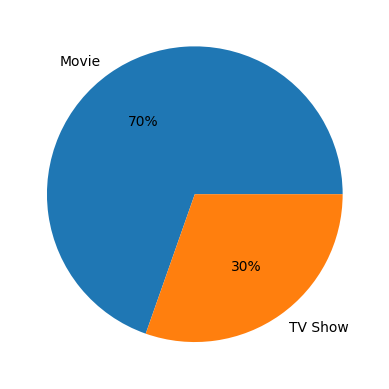

In [27]:
plt.pie(df.type.value_counts(), labels=df.type.value_counts().index, autopct='%.0f%%')
plt.show()

In [28]:
df_dir=df
df_dir=df_dir.explode('director', ignore_index=True)
df_dir.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[Unknown_Cast],[United States],2021-09-25,2020,PG-13,90,[Documentaries]
1,s2,TV Show,Blood & Water,Unknown_Director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,2,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[Unknown_Country],2021-09-24,2021,TV-MA,1,"[Crime TV Shows, International TV Shows, TV Ac..."


In [29]:
df_dir.director.value_counts()

director
Unknown_Director    2634
Rajiv Chilaka         22
Jan Suter             21
Raúl Campos           19
Suhas Kadav           16
                    ... 
Raymie Muzquiz         1
Stu Livingston         1
Joe Menendez           1
Eric Bross             1
Mozez Singh            1
Name: count, Length: 4994, dtype: int64

In [30]:
df_dir=df_dir[df_dir.director!='Unknown_Director']
df_dir

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[Unknown_Cast],[United States],2021-09-25,2020,PG-13,90,[Documentaries]
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[Unknown_Country],2021-09-24,2021,TV-MA,1,"[Crime TV Shows, International TV Shows, TV Ac..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"[Kate Siegel, Zach Gilford, Hamish Linklater, ...",[Unknown_Country],2021-09-24,2021,TV-MA,1,"[TV Dramas, TV Horror, TV Mysteries]"
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,"[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",[Unknown_Country],2021-09-24,2021,PG,91,[Children & Family Movies]
7,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,"[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",[Unknown_Country],2021-09-24,2021,PG,91,[Children & Family Movies]
...,...,...,...,...,...,...,...,...,...,...,...
9606,s8802,Movie,Zinzana,Majid Al Ansari,"[Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri,...","[United Arab Emirates, Jordan]",2016-03-09,2015,TV-MA,96,"[Dramas, International Movies, Thrillers]"
9607,s8803,Movie,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",[United States],2019-11-20,2007,R,158,"[Cult Movies, Dramas, Thrillers]"
9609,s8805,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",[United States],2019-11-01,2009,R,88,"[Comedies, Horror Movies]"
9610,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",[United States],2020-01-11,2006,PG,88,"[Children & Family Movies, Comedies]"


In [31]:
df_dir.director.value_counts()[:10]

director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Name: count, dtype: int64

<Axes: xlabel='director'>

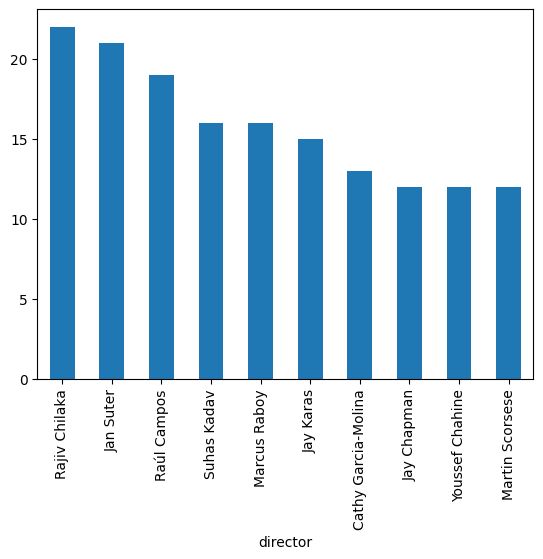

In [32]:
# Top 10 Directors
df_dir.director.value_counts()[:10].plot(kind='bar')

<Axes: xlabel='director'>

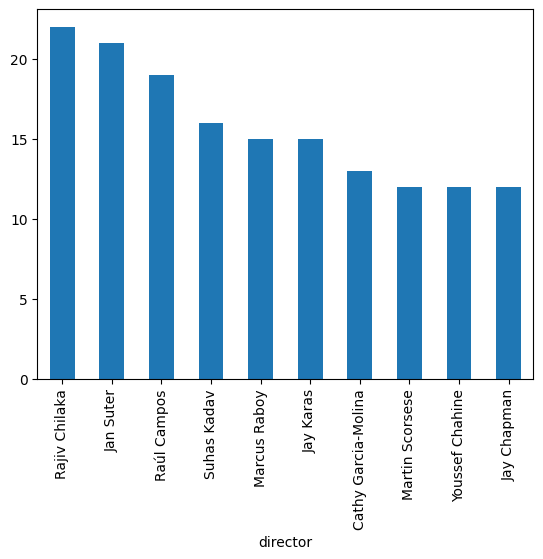

In [33]:
# Top 10 Movie Directors 
df_dir[df_dir.type=='Movie'].director.value_counts()[:10].plot(kind='bar')

<Axes: xlabel='director'>

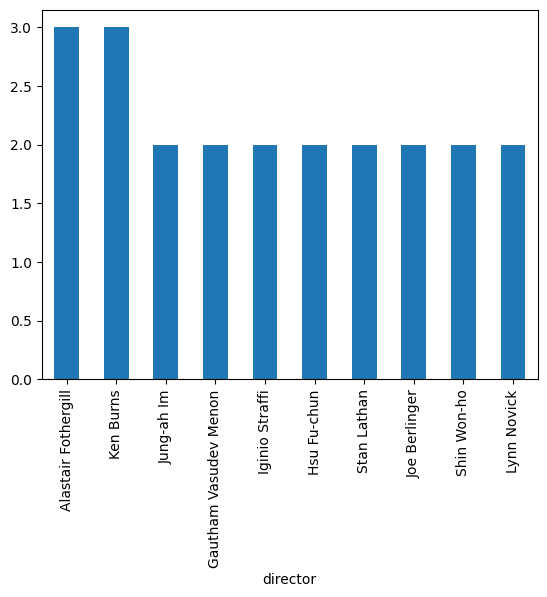

In [34]:
# Top 10 TV Show Directors
df_dir[df_dir.type=='TV Show'].director.value_counts()[:10].plot(kind='bar')

In [36]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown_Cast],[United States],2021-09-25,2020,PG-13,90,[Documentaries]
1,s2,TV Show,Blood & Water,[Unknown_Director],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,2,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[Unknown_Country],2021-09-24,2021,TV-MA,1,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,[Unknown_Director],[Unknown_Cast],[Unknown_Country],2021-09-24,2021,TV-MA,1,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,[Unknown_Director],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],2021-09-24,2021,TV-MA,2,"[International TV Shows, Romantic TV Shows, TV..."


In [37]:
df_cast=df
df_cast=df_cast.explode('cast', ignore_index=True)
df_cast.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],Unknown_Cast,[United States],2021-09-25,2020,PG-13,90,[Documentaries]
1,s2,TV Show,Blood & Water,[Unknown_Director],Ama Qamata,[South Africa],2021-09-24,2021,TV-MA,2,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s2,TV Show,Blood & Water,[Unknown_Director],Khosi Ngema,[South Africa],2021-09-24,2021,TV-MA,2,"[International TV Shows, TV Dramas, TV Mysteries]"


In [38]:
df_cast=df_cast[df_cast.cast!='Unknown_Cast']
df_cast

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
1,s2,TV Show,Blood & Water,[Unknown_Director],Ama Qamata,[South Africa],2021-09-24,2021,TV-MA,2,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s2,TV Show,Blood & Water,[Unknown_Director],Khosi Ngema,[South Africa],2021-09-24,2021,TV-MA,2,"[International TV Shows, TV Dramas, TV Mysteries]"
3,s2,TV Show,Blood & Water,[Unknown_Director],Gail Mabalane,[South Africa],2021-09-24,2021,TV-MA,2,"[International TV Shows, TV Dramas, TV Mysteries]"
4,s2,TV Show,Blood & Water,[Unknown_Director],Thabang Molaba,[South Africa],2021-09-24,2021,TV-MA,2,"[International TV Shows, TV Dramas, TV Mysteries]"
5,s2,TV Show,Blood & Water,[Unknown_Director],Dillon Windvogel,[South Africa],2021-09-24,2021,TV-MA,2,"[International TV Shows, TV Dramas, TV Mysteries]"
...,...,...,...,...,...,...,...,...,...,...,...
64946,s8807,Movie,Zubaan,[Mozez Singh],Manish Chaudhary,[India],2019-03-02,2015,TV-14,111,"[Dramas, International Movies, Music & Musicals]"
64947,s8807,Movie,Zubaan,[Mozez Singh],Meghna Malik,[India],2019-03-02,2015,TV-14,111,"[Dramas, International Movies, Music & Musicals]"
64948,s8807,Movie,Zubaan,[Mozez Singh],Malkeet Rauni,[India],2019-03-02,2015,TV-14,111,"[Dramas, International Movies, Music & Musicals]"
64949,s8807,Movie,Zubaan,[Mozez Singh],Anita Shabdish,[India],2019-03-02,2015,TV-14,111,"[Dramas, International Movies, Music & Musicals]"


In [39]:
df_cast.cast.value_counts()[:10]

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64

<Axes: xlabel='cast'>

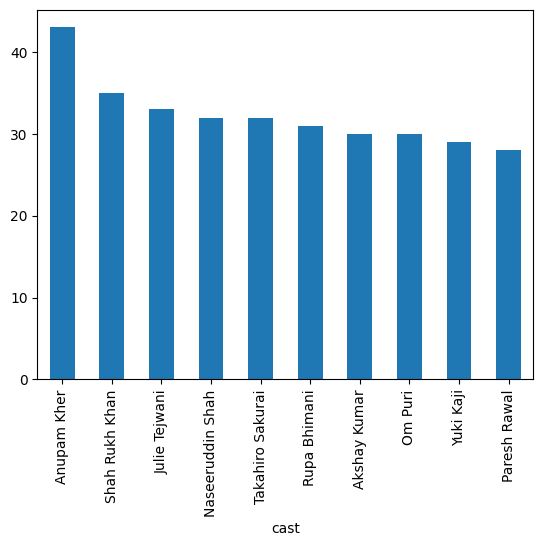

In [40]:
df_cast.cast.value_counts()[:10].plot(kind='bar')

<Axes: xlabel='cast'>

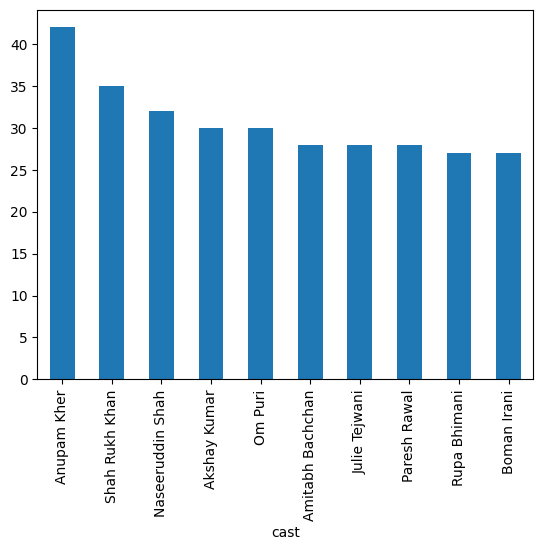

In [41]:
df_cast[df_cast.type=='Movie'].cast.value_counts()[:10].plot(kind='bar')

<Axes: xlabel='cast'>

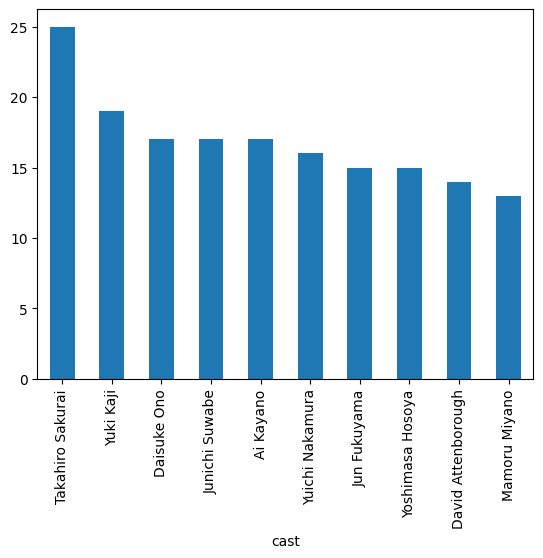

In [42]:
df_cast[df_cast.type=='TV Show'].cast.value_counts()[:10].plot(kind='bar')

In [43]:
df_cnty=df
df_cnty=df_cnty.explode('country', ignore_index=True)
df_cnty=df_cnty[df_cnty.country!='Unknown_Country']
df_cnty

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown_Cast],United States,2021-09-25,2020,PG-13,90,[Documentaries]
1,s2,TV Show,Blood & Water,[Unknown_Director],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,2021-09-24,2021,TV-MA,2,"[International TV Shows, TV Dramas, TV Mysteries]"
4,s5,TV Show,Kota Factory,[Unknown_Director],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,2021-09-24,2021,TV-MA,2,"[International TV Shows, Romantic TV Shows, TV..."
7,s8,Movie,Sankofa,[Haile Gerima],"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",United States,2021-09-24,1993,TV-MA,125,"[Dramas, Independent Movies, International Mov..."
8,s8,Movie,Sankofa,[Haile Gerima],"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",Ghana,2021-09-24,1993,TV-MA,125,"[Dramas, Independent Movies, International Mov..."
...,...,...,...,...,...,...,...,...,...,...,...
10839,s8802,Movie,Zinzana,[Majid Al Ansari],"[Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri,...",Jordan,2016-03-09,2015,TV-MA,96,"[Dramas, International Movies, Thrillers]"
10840,s8803,Movie,Zodiac,[David Fincher],"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",United States,2019-11-20,2007,R,158,"[Cult Movies, Dramas, Thrillers]"
10842,s8805,Movie,Zombieland,[Ruben Fleischer],"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",United States,2019-11-01,2009,R,88,"[Comedies, Horror Movies]"
10843,s8806,Movie,Zoom,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,2020-01-11,2006,PG,88,"[Children & Family Movies, Comedies]"


In [44]:
df_cnty.country.value_counts()[:10]

country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64

<Axes: xlabel='country'>

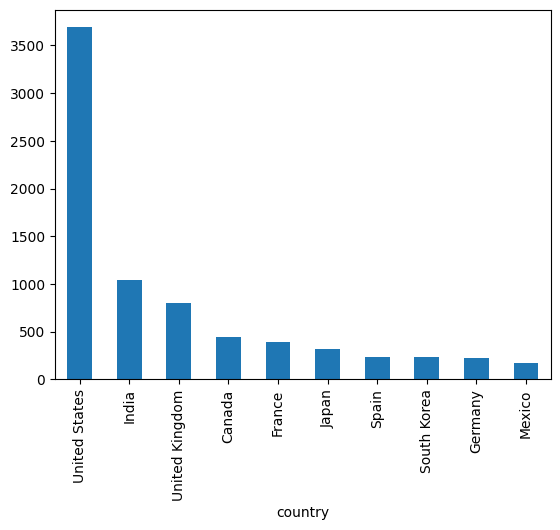

In [45]:
df_cnty.country.value_counts()[:10].plot(kind='bar')

In [46]:
df_cnty[df_cnty.type=='Movie'].country.value_counts()[:10]

country
United States     2751
India              962
United Kingdom     532
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Mexico             111
Name: count, dtype: int64

<Axes: xlabel='country'>

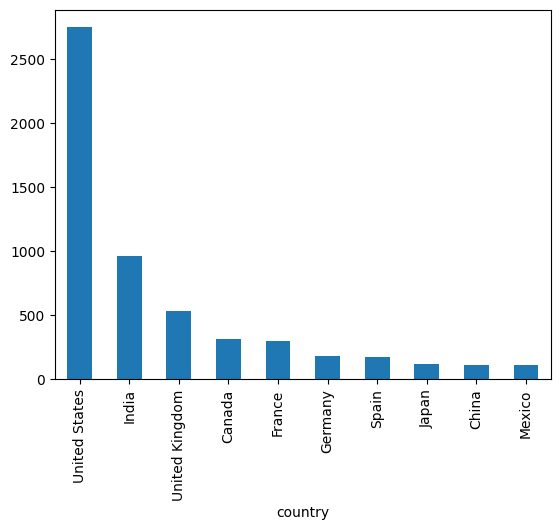

In [47]:
df_cnty[df_cnty.type=='Movie'].country.value_counts()[:10].plot(kind='bar')

In [48]:
df_cnty[df_cnty.type=='TV Show'].country.value_counts()[:10]

country
United States     938
United Kingdom    272
Japan             199
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          66
Spain              61
Name: count, dtype: int64

<Axes: xlabel='country'>

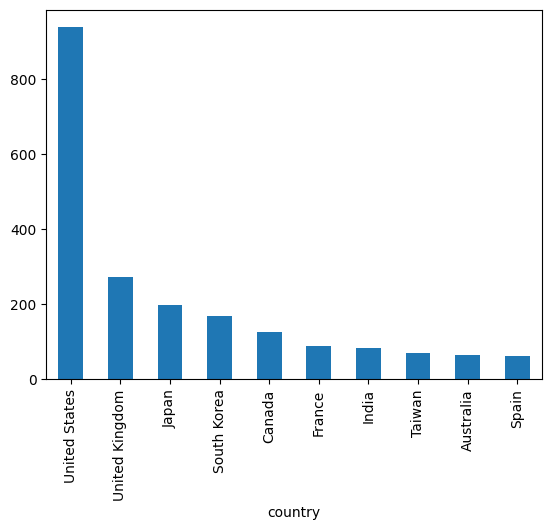

In [49]:
df_cnty[df_cnty.type=='TV Show'].country.value_counts()[:10].plot(kind='bar')

In [51]:
df.rating.value_counts()

rating
TV-MA            3207
TV-14            2160
TV-PG             863
R                 799
PG-13             490
TV-Y7             334
TV-Y              307
PG                287
TV-G              220
NR                 80
G                  41
TV-Y7-FV            6
Unknown_Genre       4
NC-17               3
UR                  3
74 min              1
84 min              1
66 min              1
Name: count, dtype: int64

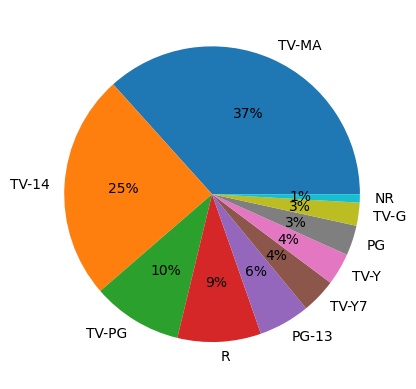

In [52]:
plt.pie(df.rating.value_counts()[:10], labels=df.rating.value_counts()[:10].index, autopct='%.0f%%')
plt.show()

In [54]:
df_gen=df
df_gen=df_gen.explode('genre', ignore_index=True)
df_gen

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown_Cast],[United States],2021-09-25,2020,PG-13,90,Documentaries
1,s2,TV Show,Blood & Water,[Unknown_Director],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,2,International TV Shows
2,s2,TV Show,Blood & Water,[Unknown_Director],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,2,TV Dramas
3,s2,TV Show,Blood & Water,[Unknown_Director],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,2,TV Mysteries
4,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[Unknown_Country],2021-09-24,2021,TV-MA,1,Crime TV Shows
...,...,...,...,...,...,...,...,...,...,...,...
19318,s8806,Movie,Zoom,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",[United States],2020-01-11,2006,PG,88,Children & Family Movies
19319,s8806,Movie,Zoom,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",[United States],2020-01-11,2006,PG,88,Comedies
19320,s8807,Movie,Zubaan,[Mozez Singh],"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...",[India],2019-03-02,2015,TV-14,111,Dramas
19321,s8807,Movie,Zubaan,[Mozez Singh],"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...",[India],2019-03-02,2015,TV-14,111,International Movies


In [55]:
df_gen.genre.value_counts()[:10]

genre
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

<Axes: xlabel='genre'>

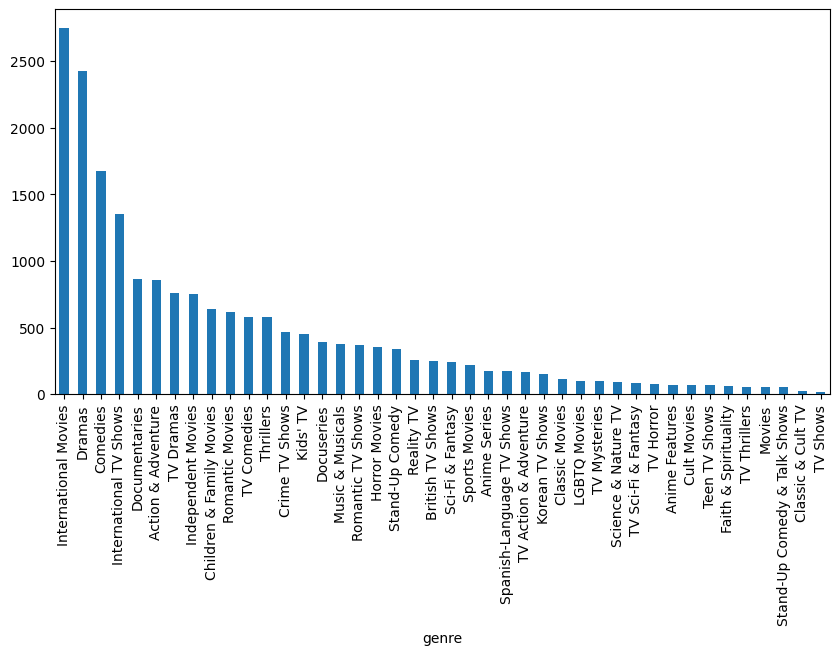

In [56]:
plt.figure(figsize=(10, 5))
df_gen.genre.value_counts().plot(kind='bar')

<Axes: xlabel='genre'>

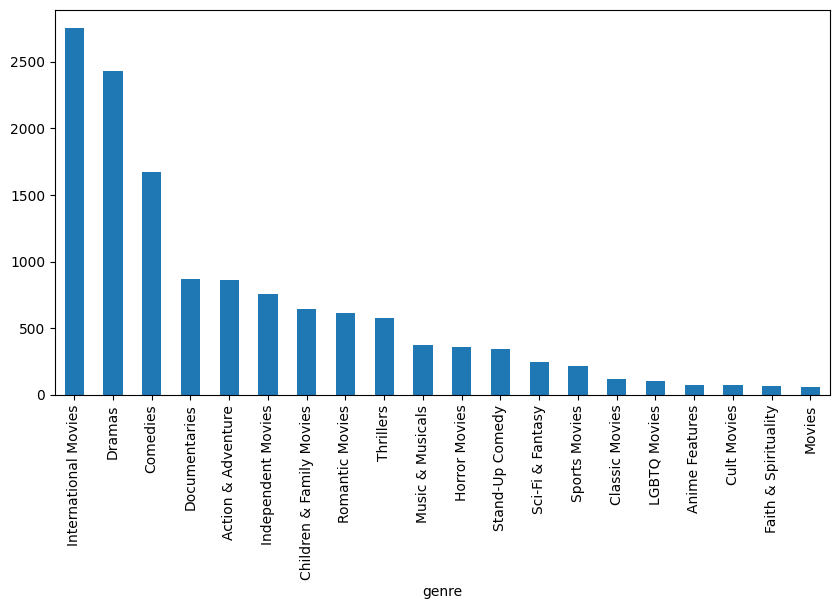

In [57]:
plt.figure(figsize=(10, 5))
df_gen[df_gen.type=='Movie'].genre.value_counts().plot(kind='bar')

<Axes: xlabel='genre'>

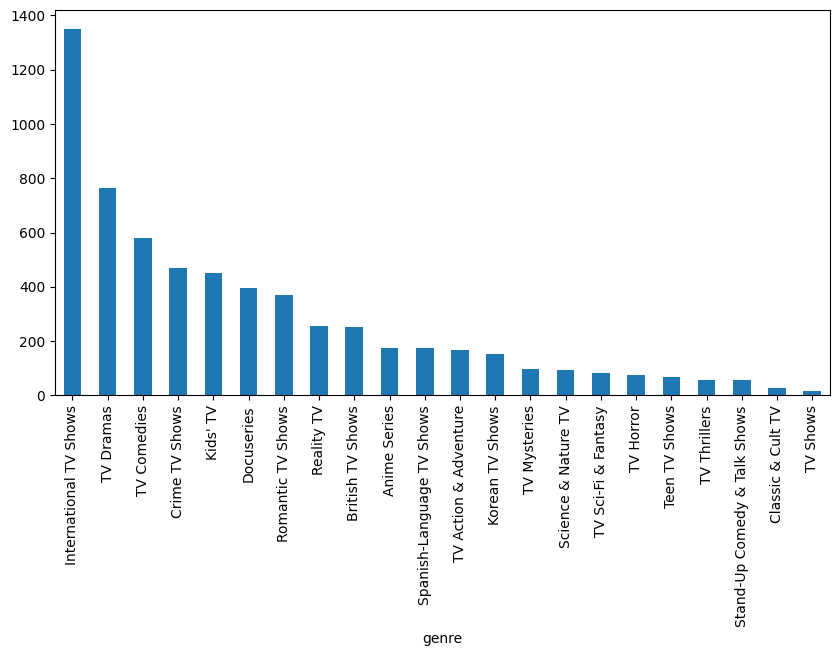

In [58]:
plt.figure(figsize=(10, 5))
df_gen[df_gen.type=='TV Show'].genre.value_counts().plot(kind='bar')

As the release date is in years then to do analysis we need date_added in years

In [59]:
df['year_added']=df.date_added.dt.year
df.year_added.astype(int)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,year_added
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown_Cast],[United States],2021-09-25,2020,PG-13,90,[Documentaries],2021
1,s2,TV Show,Blood & Water,[Unknown_Director],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,2,"[International TV Shows, TV Dramas, TV Mysteries]",2021
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[Unknown_Country],2021-09-24,2021,TV-MA,1,"[Crime TV Shows, International TV Shows, TV Ac...",2021
3,s4,TV Show,Jailbirds New Orleans,[Unknown_Director],[Unknown_Cast],[Unknown_Country],2021-09-24,2021,TV-MA,1,"[Docuseries, Reality TV]",2021
4,s5,TV Show,Kota Factory,[Unknown_Director],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],2021-09-24,2021,TV-MA,2,"[International TV Shows, Romantic TV Shows, TV...",2021
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,[David Fincher],"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",[United States],2019-11-20,2007,R,158,"[Cult Movies, Dramas, Thrillers]",2019
8803,s8804,TV Show,Zombie Dumb,[Unknown_Director],[Unknown_Cast],[Unknown_Country],2019-07-01,2018,TV-Y7,2,"[Kids' TV, Korean TV Shows, TV Comedies]",2019
8804,s8805,Movie,Zombieland,[Ruben Fleischer],"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",[United States],2019-11-01,2009,R,88,"[Comedies, Horror Movies]",2019
8805,s8806,Movie,Zoom,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",[United States],2020-01-11,2006,PG,88,"[Children & Family Movies, Comedies]",2020


<Axes: ylabel='year_added'>

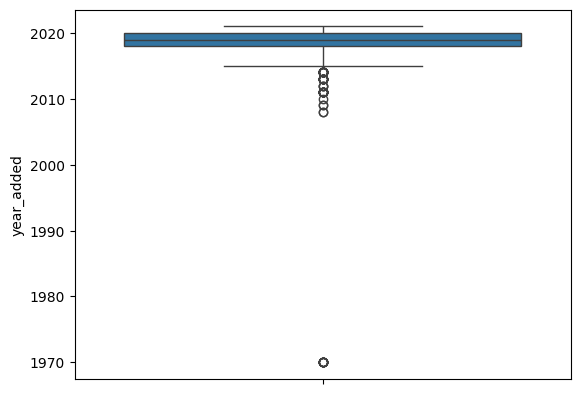

In [60]:
sns.boxplot(df.year_added)

In [61]:
df.year_added.max(), df.year_added.min()

(2021, 1970)

In [62]:
df[['release_year', 'year_added']].describe()

,release_year,year_added
count,8807.000000,8807.000000
mean,2014.180198,2018.816396
std,8.819312,2.276985
min,1925.000000,1970.000000
25%,2013.000000,2018.000000
50%,2017.000000,2019.000000
75%,2019.000000,2020.000000
max,2021.000000,2021.000000


<Axes: xlabel='date_added', ylabel='Count'>

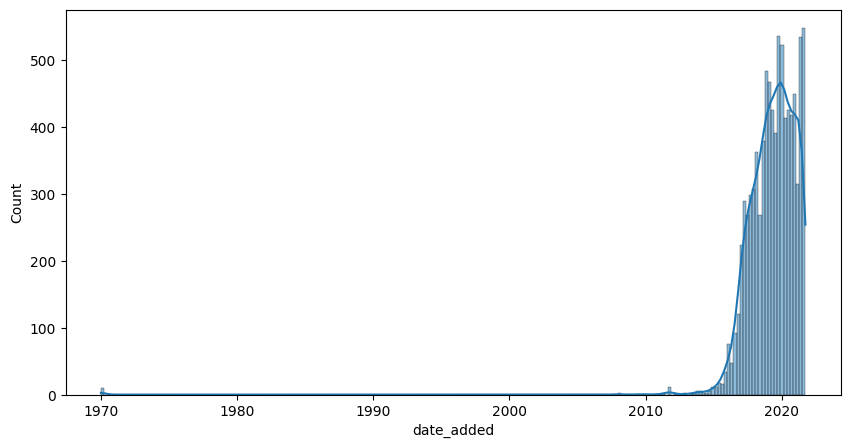

In [63]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='date_added', kde=True)

Due to very low min value of Year added, we will use IQR mthod to deal with outliner

In [64]:
#Whisker values low, high
int(2018-1.5*(2020-2018)), int(1.5*(2020-2018)+2020)

(2015, 2023)

<Axes: xlabel='date_added', ylabel='Count'>

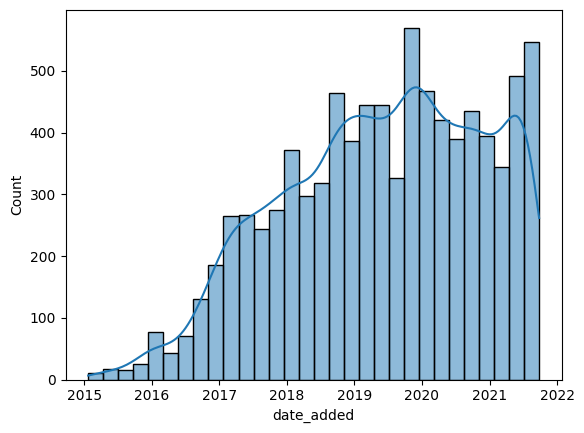

In [65]:
#As we do not have any outliner at the higher end so we will only limiting the lower side at 2015
sns.histplot(data=df[df.year_added>=2015], x='date_added', kde=True)

<Axes: ylabel='release_year'>

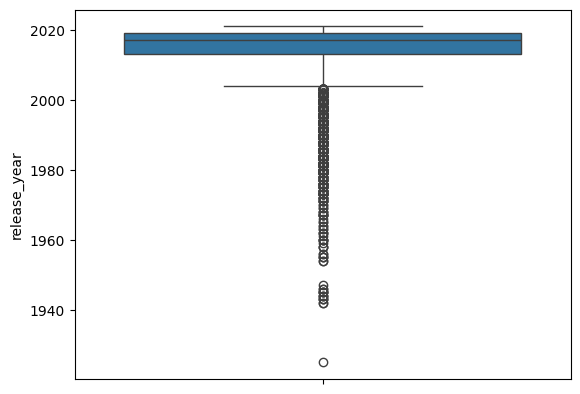

In [66]:
sns.boxplot(df.release_year)

Due to very low min value of Year added, we will use IQR mthod to deal with outliner

(<Axes: ylabel='release_year'>, 2005.0)

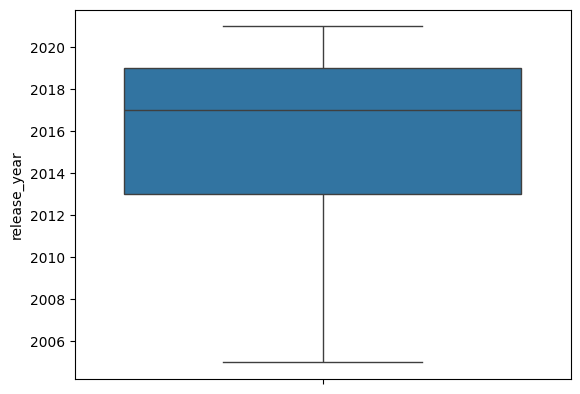

In [67]:
low, high=df.release_year.quantile([.09,1])
sns.boxplot(df.release_year.clip(low, high)), low

<Axes: xlabel='release_year', ylabel='Count'>

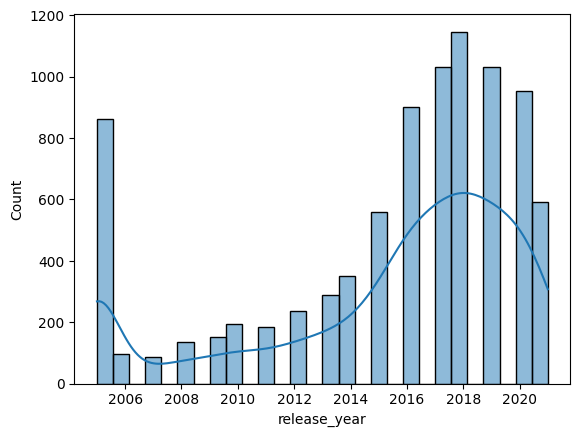

In [68]:
sns.histplot(data=df.release_year.clip(low, high), kde=True)

In [70]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,year_added
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown_Cast],[United States],2021-09-25,2020,PG-13,90,[Documentaries],2021
1,s2,TV Show,Blood & Water,[Unknown_Director],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,2,"[International TV Shows, TV Dramas, TV Mysteries]",2021
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[Unknown_Country],2021-09-24,2021,TV-MA,1,"[Crime TV Shows, International TV Shows, TV Ac...",2021
3,s4,TV Show,Jailbirds New Orleans,[Unknown_Director],[Unknown_Cast],[Unknown_Country],2021-09-24,2021,TV-MA,1,"[Docuseries, Reality TV]",2021
4,s5,TV Show,Kota Factory,[Unknown_Director],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],2021-09-24,2021,TV-MA,2,"[International TV Shows, Romantic TV Shows, TV...",2021


In [73]:
df['release_week']=df.date_added.dt.isocalendar().week
df['release_month']=df.date_added.dt.month
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,year_added,release_week,release_month
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown_Cast],[United States],2021-09-25,2020,PG-13,90,[Documentaries],2021,38,9
1,s2,TV Show,Blood & Water,[Unknown_Director],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,2,"[International TV Shows, TV Dramas, TV Mysteries]",2021,38,9
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[Unknown_Country],2021-09-24,2021,TV-MA,1,"[Crime TV Shows, International TV Shows, TV Ac...",2021,38,9
3,s4,TV Show,Jailbirds New Orleans,[Unknown_Director],[Unknown_Cast],[Unknown_Country],2021-09-24,2021,TV-MA,1,"[Docuseries, Reality TV]",2021,38,9
4,s5,TV Show,Kota Factory,[Unknown_Director],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],2021-09-24,2021,TV-MA,2,"[International TV Shows, Romantic TV Shows, TV...",2021,38,9


In [74]:
df.release_week.value_counts()

release_week
1     382
44    318
40    287
31    268
26    268
35    263
9     254
13    250
27    240
18    234
5     208
22    206
48    199
50    189
37    183
14    173
39    166
24    164
11    163
16    160
30    160
17    154
33    153
15    152
23    151
7     147
25    143
34    143
36    142
49    140
29    140
38    139
51    137
10    135
42    135
46    134
52    132
20    131
28    130
32    122
47    120
21    117
41    116
19    116
43    116
3     113
8     110
12    109
2     108
53    104
45     98
6      97
4      88
Name: count, dtype: Int64

In [75]:
df.release_month.value_counts()

release_month
7     827
12    813
9     770
4     764
10    760
8     755
1     748
3     742
6     728
11    705
5     632
2     563
Name: count, dtype: int64

In [93]:
df.release_week.value_counts().sort_values(ascending=False)[:10]

release_week
1     382
44    318
40    287
31    268
26    268
35    263
9     254
13    250
27    240
18    234
Name: count, dtype: Int64

<Axes: xlabel='release_week'>

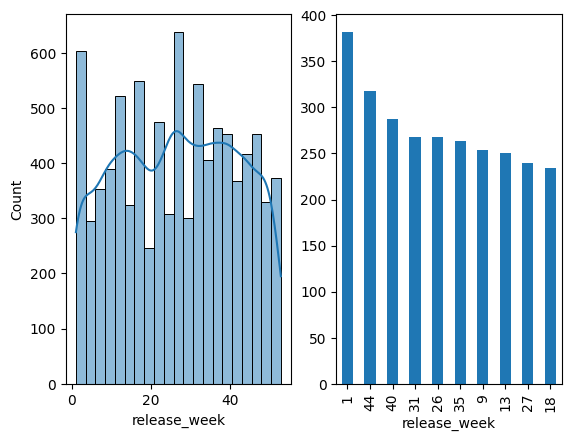

In [106]:
plt.subplot(1,2,1)
sns.histplot(df.release_week, kde=True)
plt.subplot(1,2,2)
df.release_week.value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

<Axes: xlabel='release_month'>

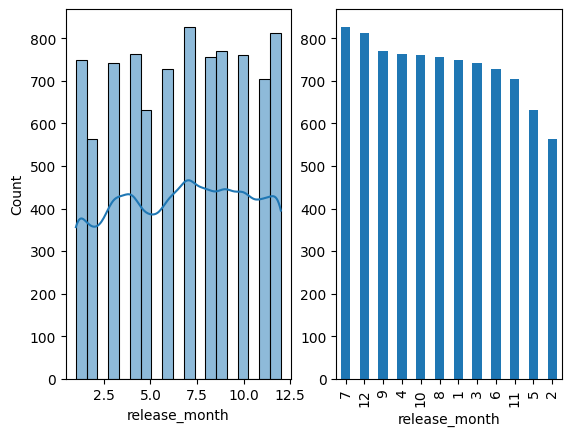

In [107]:
plt.subplot(1,2,1)
sns.histplot(df.release_month, kde=True)
plt.subplot(1,2,2)
df.release_month.value_counts().sort_values(ascending=False).plot(kind='bar')

In [117]:
df[df.type=='Movie'].release_week.value_counts()

release_week
1     316
44    243
40    215
9     207
26    195
35    189
31    185
13    174
18    173
27    154
22    146
48    139
5     135
16    124
14    124
50    119
30    116
11    115
37    114
23    112
39    111
17    109
10    107
7     106
33    105
34    102
25    101
15    100
36     97
49     95
29     94
42     90
24     89
28     89
43     88
38     88
51     86
47     85
20     85
41     84
46     83
3      81
52     80
2      78
21     76
19     73
32     73
8      72
12     67
6      64
45     61
53     61
4      56
Name: count, dtype: Int64

In [118]:
df[df.type=='TV Show'].release_week.value_counts()

release_week
27    86
31    83
13    76
44    75
24    75
35    74
26    73
5     73
40    72
50    70
37    69
1     66
18    61
22    60
48    60
39    55
52    52
15    52
51    51
46    51
38    51
14    49
32    49
11    48
33    48
9     47
20    46
29    46
17    45
36    45
42    45
49    45
30    44
53    43
19    43
25    42
12    42
21    41
28    41
34    41
7     41
23    39
8     38
45    37
16    36
47    35
6     33
4     32
41    32
3     32
2     30
43    28
10    28
Name: count, dtype: Int64

<Axes: xlabel='release_week'>

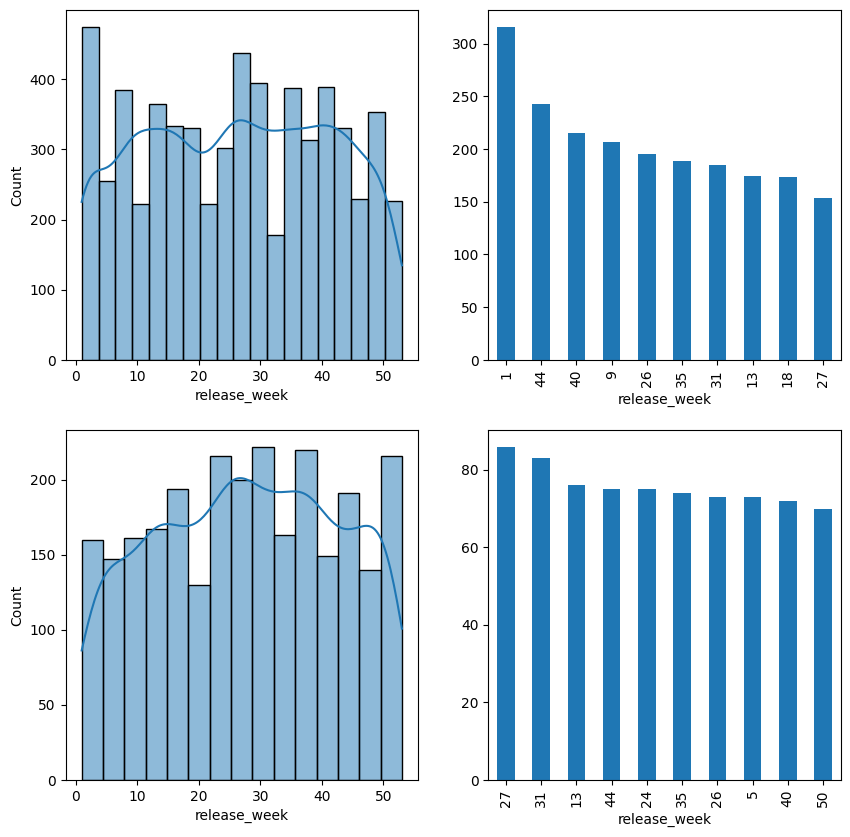

In [120]:
# Week distribution of Movie and TV Shows Added
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(df[df.type=='Movie'].release_week, kde=True)
plt.subplot(2,2,2)
df[df.type=='Movie'].release_week.value_counts().sort_values(ascending=False)[:10].plot(kind='bar')
plt.subplot(2,2,3)
sns.histplot(df[df.type=='TV Show'].release_week, kde=True)
plt.subplot(2,2,4)
df[df.type=='TV Show'].release_week.value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

In [114]:
df[df.type=='Movie'].release_month.value_counts()

release_month
7     565
4     550
12    547
1     546
10    545
3     529
9     519
8     519
11    498
6     492
5     439
2     382
Name: count, dtype: int64

In [115]:
df[df.type=='TV Show'].release_month.value_counts()

release_month
12    266
7     262
9     251
8     236
6     236
10    215
4     214
3     213
11    207
1     202
5     193
2     181
Name: count, dtype: int64

<Axes: xlabel='release_month'>

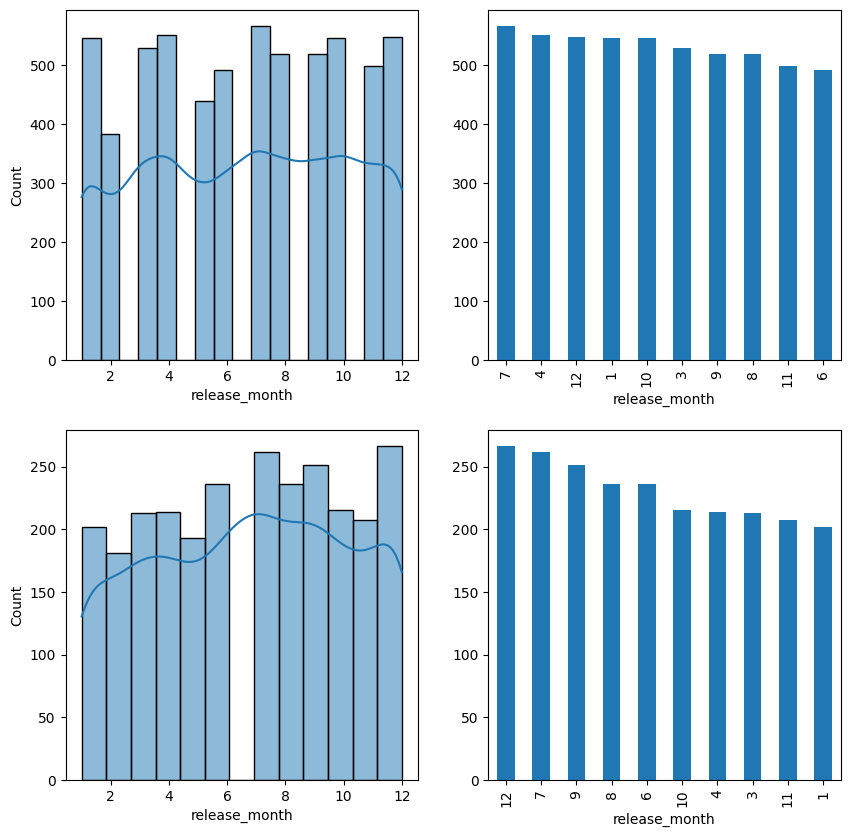

In [119]:
# Month distribution of Movie and TV Shows Added
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(df[df.type=='Movie'].release_month, kde=True)
plt.subplot(2,2,2)
df[df.type=='Movie'].release_month.value_counts().sort_values(ascending=False)[:10].plot(kind='bar')
plt.subplot(2,2,3)
sns.histplot(df[df.type=='TV Show'].release_month, kde=True)
plt.subplot(2,2,4)
df[df.type=='TV Show'].release_month.value_counts().sort_values(ascending=False)[:10].plot(kind='bar')